In [1]:
# Load Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
crime = pd.read_csv('Crime LA/Crime_Data_from_2020_to_Present_20250320 (1).csv')

# Understand and Clean Data

In [4]:
crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E AVENUE 28,NaN,34.0820,-118.2130


In [5]:
crime.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [6]:
crime.shape

(1005149, 28)

In [7]:
#Check Nulls
crime.isna().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151741
Vict Age                0
Vict Sex           144765
Vict Descent       144777
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677885
Weapon Desc        677885
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           935996
Crm Cd 3          1002835
Crm Cd 4          1005085
LOCATION                0
Cross Street       850909
LAT                     0
LON                     0
dtype: int64

In [8]:
df = crime.drop(labels = ['Mocodes','Weapon Used Cd','Weapon Desc','Crm Cd 2','Crm Cd 3','Crm Cd 4','Cross Street'], axis = 1)
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,M,O,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,M,O,405.0,CLOTHING STORE,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
4,200412582,09/09/2020 12:00:00 AM,09/09/2020 12:00:00 AM,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,NaN,NaN,101.0,STREET,IC,Invest Cont,510.0,200 E AVENUE 28,34.0820,-118.2130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005144,252104053,01/19/2025 12:00:00 AM,01/17/2025 12:00:00 AM,1530,21,Topanga,2114,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,M,W,720.0,JUNIOR HIGH SCHOOL,IC,Invest Cont,341.0,22200 ELKWOOD ST,34.2128,-118.6103
1005145,250304214,02/23/2025 12:00:00 AM,02/21/2025 12:00:00 AM,1530,3,Southwest,358,1,510,VEHICLE - STOLEN,...,NaN,NaN,101.0,STREET,IC,Invest Cont,510.0,3600 MCCLINTOCK AV,34.0212,-118.2895
1005146,250304203,02/20/2025 12:00:00 AM,02/13/2025 12:00:00 AM,2100,3,Southwest,325,1,522,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",...,NaN,NaN,108.0,PARKING LOT,IC,Invest Cont,522.0,2600 ELLENDALE PL,34.0307,-118.2923
1005147,250504051,01/14/2025 12:00:00 AM,01/14/2025 12:00:00 AM,1250,5,Harbor,509,1,210,ROBBERY,...,F,H,721.0,HIGH SCHOOL,IC,Invest Cont,210.0,24300 WESTERN AV,33.8046,-118.3074


In [9]:
df.sort_values(by = 'Date Rptd')

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
174447,201704022,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,20,17,Devonshire,1785,2,624,BATTERY - SIMPLE ASSAULT,...,F,H,103.0,ALLEY,AO,Adult Other,624.0,18700 NORDHOFF ST,34.2355,-118.5404
102667,200104051,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,200,1,Central,161,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,F,A,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,440.0,800 FRANCISCO ST,34.0487,-118.2627
90903,201204068,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1900,12,77th Street,1269,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,F,H,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,626.0,900 E 80TH ST,33.9665,-118.2586
142519,202104034,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,2030,21,Topanga,2157,2,850,INDECENT EXPOSURE,...,F,W,108.0,PARKING LOT,IC,Invest Cont,850.0,6700 INDEPENDENCE AV,34.1921,-118.5906
93309,200604194,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,100,6,Hollywood,668,2,237,CHILD NEGLECT (SEE 300 W.I.C.),...,F,H,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,237.0,5700 VIRGINIA AV,34.0918,-118.3136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697099,230321983,12/31/2023 12:00:00 AM,12/31/2023 12:00:00 AM,857,3,Southwest,328,2,625,OTHER ASSAULT,...,M,H,210.0,RESTAURANT/FAST FOOD,IC,Invest Cont,625.0,2900 S FIGUEROA ST,34.0268,-118.2808
752072,240204188,12/31/2023 12:00:00 AM,12/31/2023 12:00:00 AM,240,2,Rampart,202,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,341.0,1000 N VERMONT AV,34.0897,-118.2917
983665,241416062,12/31/2024 12:00:00 AM,12/28/2024 12:00:00 AM,1811,14,Pacific,1427,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,F,B,710.0,OTHER PREMISE,IC,Invest Cont,341.0,3000 S SEPULVEDA BL,34.0274,-118.4287
959584,240317263,12/31/2024 12:00:00 AM,12/30/2024 12:00:00 AM,1830,3,Southwest,327,1,510,VEHICLE - STOLEN,...,NaN,NaN,121.0,YARD (RESIDENTIAL/BUSINESS),IC,Invest Cont,510.0,1100 W 28TH ST,34.0294,-118.2840


In [10]:
#Update data types
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')

df

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005149 entries, 0 to 1005148
Data columns (total 21 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   DR_NO         1005149 non-null  int64         
 1   Date Rptd     1005149 non-null  datetime64[ns]
 2   DATE OCC      1005149 non-null  datetime64[ns]
 3   TIME OCC      1005149 non-null  int64         
 4   AREA          1005149 non-null  int64         
 5   AREA NAME     1005149 non-null  object        
 6   Rpt Dist No   1005149 non-null  int64         
 7   Part 1-2      1005149 non-null  int64         
 8   Crm Cd        1005149 non-null  int64         
 9   Crm Cd Desc   1005149 non-null  object        
 10  Vict Age      1005149 non-null  int64         
 11  Vict Sex      860384 non-null   object        
 12  Vict Descent  860372 non-null   object        
 13  Premis Cd     1005133 non-null  float64       
 14  Premis Desc   1004561 non-null  object        
 15

In [13]:
df.describe(include = ['float64','int64'])

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1,LAT,LON
count,1.005149e+06,1.005149e+06,1.005149e+06,1.005149e+06,1.005149e+06,1.005149e+06,1.005149e+06,1.005133e+06,1.005138e+06,1.005149e+06,1.005149e+06
mean,2.202264e+08,1.339914e+03,1.069108e+01,1.115566e+03,1.400290e+00,5.001465e+02,2.891334e+01,3.056149e+02,4.999071e+02,3.399820e+01,-1.180909e+02
std,1.319954e+07,6.510595e+02,6.110401e+00,6.111749e+02,4.899573e-01,2.052626e+02,2.199376e+01,2.193121e+02,2.050632e+02,1.610587e+00,5.581948e+00
min,8.170000e+02,1.000000e+00,1.000000e+00,1.010000e+02,1.000000e+00,1.100000e+02,-4.000000e+00,1.010000e+02,1.100000e+02,0.000000e+00,-1.186676e+02
25%,2.106169e+08,9.000000e+02,5.000000e+00,5.870000e+02,1.000000e+00,3.310000e+02,0.000000e+00,1.010000e+02,3.310000e+02,3.401470e+01,-1.184305e+02
50%,2.209160e+08,1.420000e+03,1.100000e+01,1.139000e+03,1.000000e+00,4.420000e+02,3.000000e+01,2.030000e+02,4.420000e+02,3.405890e+01,-1.183225e+02
75%,2.311105e+08,1.900000e+03,1.600000e+01,1.613000e+03,2.000000e+00,6.260000e+02,4.400000e+01,5.010000e+02,6.260000e+02,3.416490e+01,-1.182739e+02
max,2.521041e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.200000e+02,9.760000e+02,9.560000e+02,3.433430e+01,0.000000e+00


In [14]:
pd.set_option('display.float_format', '{:.6f}'.format)
df.describe(include = ['float64','int64'])

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1,LAT,LON
count,1005149.000000,1005149.000000,1005149.000000,1005149.000000,1005149.000000,1005149.000000,1005149.000000,1005133.000000,1005138.000000,1005149.000000,1005149.000000
mean,220226393.863871,1339.914470,10.691076,1115.566333,1.400290,500.146541,28.913344,305.614925,499.907128,33.998203,-118.090905
std,13199538.733822,651.059467,6.110401,611.174908,0.489957,205.262641,21.993756,219.312053,205.063199,1.610587,5.581948
min,817.000000,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,110.000000,0.000000,-118.667600
25%,210616910.000000,900.000000,5.000000,587.000000,1.000000,331.000000,0.000000,101.000000,331.000000,34.014700,-118.430500
50%,220916013.000000,1420.000000,11.000000,1139.000000,1.000000,442.000000,30.000000,203.000000,442.000000,34.058900,-118.322500
75%,231110466.000000,1900.000000,16.000000,1613.000000,2.000000,626.000000,44.000000,501.000000,626.000000,34.164900,-118.273900
max,252104145.000000,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,956.000000,34.334300,0.000000


In [15]:
df['Vict Age'].value_counts()

Vict Age
 0      269353
 30      22288
 35      21833
 31      21420
 29      21345
         ...  
 98         71
-2          28
-3           5
-4           3
 120         1
Name: count, Length: 104, dtype: int64

In [16]:
df_age = df[df['Vict Age']>0]

In [17]:
df_age['Vict Age'].value_counts()

Vict Age
30     22288
35     21833
31     21420
29     21345
28     20969
       ...  
95       100
96        95
97        72
98        71
120        1
Name: count, Length: 99, dtype: int64

In [18]:
df['year'] = df['DATE OCC'].dt.year 
df['month'] = df['DATE OCC'].dt.month

In [19]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,year,month
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,101.000000,STREET,AA,Adult Arrest,510.000000,1900 S LONGWOOD AV,34.037500,-118.350600,2020,3
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,128.000000,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.000000,1000 S FLOWER ST,34.044400,-118.262800,2020,2
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,502.000000,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480.000000,1400 W 37TH ST,34.021000,-118.300200,2020,11
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,405.000000,CLOTHING STORE,IC,Invest Cont,343.000000,14000 RIVERSIDE DR,34.157600,-118.438700,2020,3
4,200412582,2020-09-09,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,101.000000,STREET,IC,Invest Cont,510.000000,200 E AVENUE 28,34.082000,-118.213000,2020,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005144,252104053,2025-01-19,2025-01-17,1530,21,Topanga,2114,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,720.000000,JUNIOR HIGH SCHOOL,IC,Invest Cont,341.000000,22200 ELKWOOD ST,34.212800,-118.610300,2025,1
1005145,250304214,2025-02-23,2025-02-21,1530,3,Southwest,358,1,510,VEHICLE - STOLEN,...,101.000000,STREET,IC,Invest Cont,510.000000,3600 MCCLINTOCK AV,34.021200,-118.289500,2025,2
1005146,250304203,2025-02-20,2025-02-13,2100,3,Southwest,325,1,522,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",...,108.000000,PARKING LOT,IC,Invest Cont,522.000000,2600 ELLENDALE PL,34.030700,-118.292300,2025,2
1005147,250504051,2025-01-14,2025-01-14,1250,5,Harbor,509,1,210,ROBBERY,...,721.000000,HIGH SCHOOL,IC,Invest Cont,210.000000,24300 WESTERN AV,33.804600,-118.307400,2025,1


# Feature Understanding

<Axes: xlabel='month'>

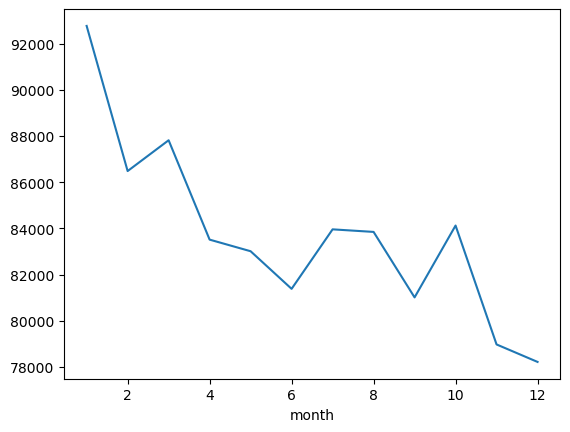

In [21]:
df['month'].value_counts().sort_index().plot()

<Axes: xlabel='year'>

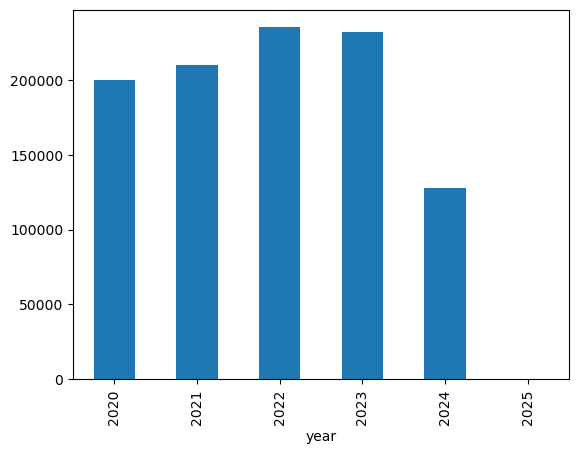

In [22]:
df['year'].value_counts().sort_index().plot(kind='bar')

In [23]:
df = df[df['Date Rptd'].dt.year != 2025] 

In [24]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,year,month
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,101.000000,STREET,AA,Adult Arrest,510.000000,1900 S LONGWOOD AV,34.037500,-118.350600,2020,3
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,128.000000,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.000000,1000 S FLOWER ST,34.044400,-118.262800,2020,2
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,502.000000,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480.000000,1400 W 37TH ST,34.021000,-118.300200,2020,11
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,405.000000,CLOTHING STORE,IC,Invest Cont,343.000000,14000 RIVERSIDE DR,34.157600,-118.438700,2020,3
4,200412582,2020-09-09,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,101.000000,STREET,IC,Invest Cont,510.000000,200 E AVENUE 28,34.082000,-118.213000,2020,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004891,240710284,2024-07-24,2024-07-23,1400,7,Wilshire,788,1,510,VEHICLE - STOLEN,...,101.000000,STREET,IC,Invest Cont,510.000000,4000 W 23RD ST,34.036200,-118.328400,2024,7
1004892,240104953,2024-01-15,2024-01-15,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,503.000000,HOTEL,IC,Invest Cont,745.000000,1300 W SUNSET BL,34.068500,-118.246000,2024,1
1004893,240410786,2024-10-14,2024-10-11,2330,4,Hollenbeck,421,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,210.000000,RESTAURANT/FAST FOOD,IC,Invest Cont,341.000000,1700 ALBION ST,34.067500,-118.224000,2024,10
1004894,240309674,2024-04-24,2024-04-24,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,102.000000,SIDEWALK,IC,Invest Cont,230.000000,FLOWER ST,34.021500,-118.286800,2024,4


In [25]:
df.groupby(['year','month']).size()

year  month
2020  1        18575
      2        17284
      3        16188
      4        15706
      5        17230
      6        17060
      7        17158
      8        16902
      9        15657
      10       16510
      11       15596
      12       15979
2021  1        16635
      2        15439
      3        16354
      4        16091
      5        17020
      6        17182
      7        18690
      8        18398
      9        18385
      10       19341
      11       18374
      12       17962
2022  1        18567
      2        17750
      3        19745
      4        19836
      5        20467
      6        20272
      7        20009
      8        20144
      9        19340
      10       20334
      11       18754
      12       20036
2023  1        19971
      2        18489
      3        19212
      4        18936
      5        18909
      6        18742
      7        19932
      8        20082
      9        19320
      10       20120
      11       19074
 

<Axes: xlabel='year,month'>

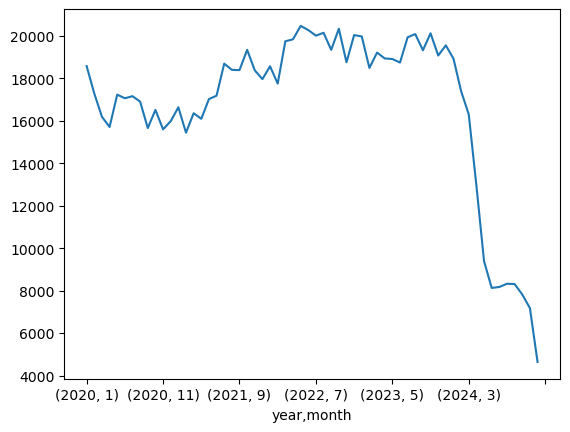

In [26]:
crime_over_time = df.groupby(['year','month']).size().plot()
crime_over_time

(array([1.08120e+04, 1.28879e+05, 2.43591e+05, 1.63133e+05, 1.06442e+05,
        6.09000e+04, 1.81470e+04, 3.25900e+03, 4.97000e+02, 1.00000e+00]),
 array([  2. ,  13.8,  25.6,  37.4,  49.2,  61. ,  72.8,  84.6,  96.4,
        108.2, 120. ]),
 <BarContainer object of 10 artists>)

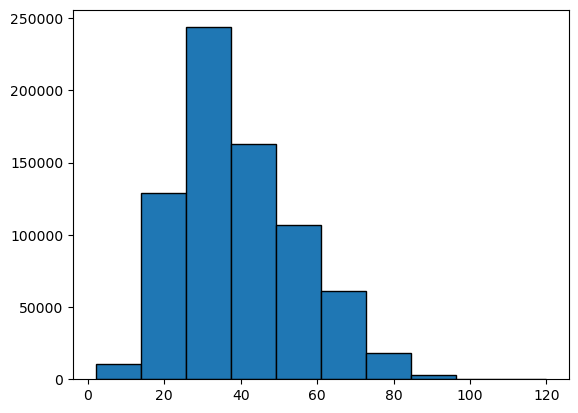

In [27]:
plt.hist(df_age['Vict Age'], edgecolor = 'black')

In [28]:
crime_count_per_day = df.groupby(['DATE OCC','Crm Cd Desc']).size()

In [29]:
crime_count_per_day

DATE OCC    Crm Cd Desc                                             
2020-01-01  ARSON                                                        4
            ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              47
            ATTEMPTED ROBBERY                                            5
            BATTERY - SIMPLE ASSAULT                                    74
            BATTERY ON A FIREFIGHTER                                     1
                                                                        ..
2024-12-30  BRANDISH WEAPON                                              1
            BURGLARY FROM VEHICLE                                        2
            THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     2
            TRESPASSING                                                  1
            VEHICLE - STOLEN                                             1
Length: 92510, dtype: int64

In [30]:
top_20_crimes = crime_count_per_day.groupby('Crm Cd Desc').mean()\
.reset_index(name = 'average_daily_count').sort_values(by = 'average_daily_count',ascending = False).head(20)

In [31]:
top_20_crimes_sorted = top_20_crimes.sort_values(by = 'average_daily_count', ascending = True)

<BarContainer object of 20 artists>

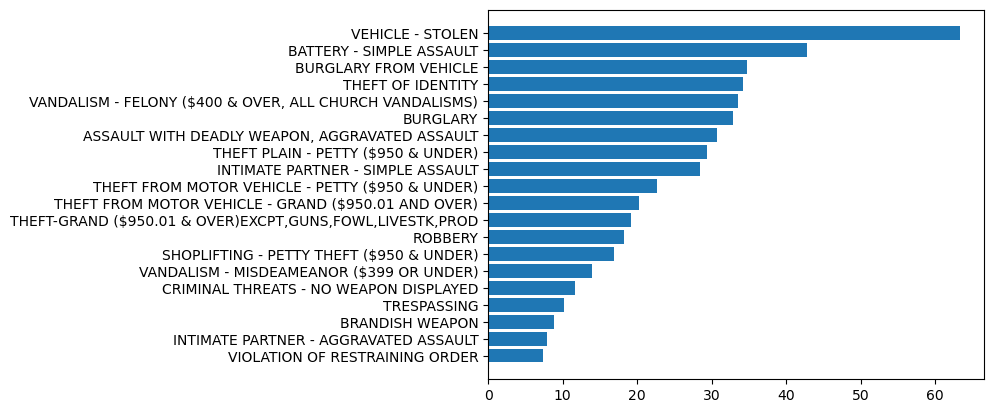

In [32]:
plt.barh(top_20_crimes_sorted['Crm Cd Desc'], top_20_crimes_sorted['average_daily_count'])

In [33]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [34]:
plt.style.use('ggplot')

Text(0.5, 1.0, 'Top 20 Crimes')

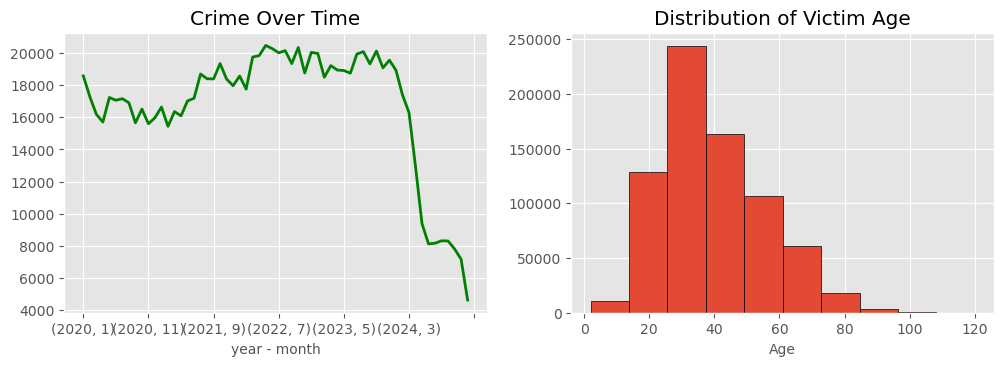

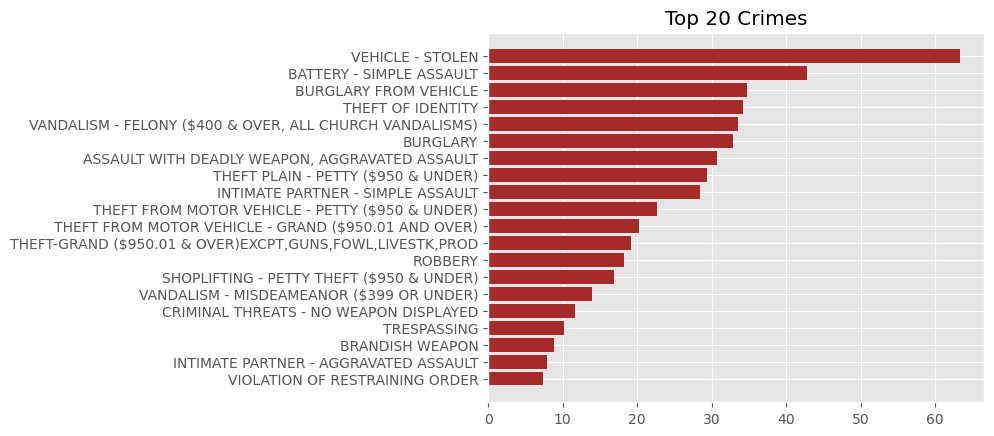

In [35]:
plt.figure(figsize = (12,8))
#Plot 1 - Line Chart
plt.subplot(2,2,1)
crime_plot = df.groupby(['year','month']).size().plot(color = 'green', linewidth = 2)
crime_plot.set_xlabel('year - month', fontsize =10)
crime_plot.set_title('Crime Over Time')

#Plot 2 - Histogram
plt.subplot(2,2,2)
plt.hist(df_age['Vict Age'], edgecolor = 'black')
plt.xlabel('Age' , fontsize = 10)
plt.title('Distribution of Victim Age')

#Plot 3 - Horizontal Bar
plt.figure()
plt.barh(top_20_crimes_sorted['Crm Cd Desc'], top_20_crimes_sorted['average_daily_count'], color = 'brown')
plt.title('Top 20 Crimes')

In [36]:
#show difference in reported and occured - How long it takes to report?
df['Time to report'] = (pd.to_datetime(df['Date Rptd']) - pd.to_datetime(df['DATE OCC'])).dt.days

/var/folders/_v/z2dx29cd2_94974tbjvp2p800000gn/T/ipykernel_88926/3104241524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time to report'] = (pd.to_datetime(df['Date Rptd']) - pd.to_datetime(df['DATE OCC'])).dt.days


In [37]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,year,month,Time to report
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,STREET,AA,Adult Arrest,510.000000,1900 S LONGWOOD AV,34.037500,-118.350600,2020,3,0
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.000000,1000 S FLOWER ST,34.044400,-118.262800,2020,2,1
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480.000000,1400 W 37TH ST,34.021000,-118.300200,2020,11,7
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,CLOTHING STORE,IC,Invest Cont,343.000000,14000 RIVERSIDE DR,34.157600,-118.438700,2020,3,1156
4,200412582,2020-09-09,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,STREET,IC,Invest Cont,510.000000,200 E AVENUE 28,34.082000,-118.213000,2020,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004891,240710284,2024-07-24,2024-07-23,1400,7,Wilshire,788,1,510,VEHICLE - STOLEN,...,STREET,IC,Invest Cont,510.000000,4000 W 23RD ST,34.036200,-118.328400,2024,7,1
1004892,240104953,2024-01-15,2024-01-15,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,HOTEL,IC,Invest Cont,745.000000,1300 W SUNSET BL,34.068500,-118.246000,2024,1,0
1004893,240410786,2024-10-14,2024-10-11,2330,4,Hollenbeck,421,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,RESTAURANT/FAST FOOD,IC,Invest Cont,341.000000,1700 ALBION ST,34.067500,-118.224000,2024,10,3
1004894,240309674,2024-04-24,2024-04-24,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,SIDEWALK,IC,Invest Cont,230.000000,FLOWER ST,34.021500,-118.286800,2024,4,0


In [38]:
df['Time to report'].value_counts()

Time to report
0       482015
1       222378
2        64437
3        37526
4        24120
         ...  
1246         1
1656         1
1610         1
1645         1
935          1
Name: count, Length: 1470, dtype: int64

In [39]:
df.groupby(['Crm Cd Desc'])['Time to report'].value_counts()

Crm Cd Desc                 Time to report
ARSON                       0                 1495
                            1                  497
                            2                  136
                            3                   94
                            4                   54
                                              ... 
WEAPONS POSSESSION/BOMBING  2                    2
                            4                    2
                            42                   2
                            3                    1
                            354                  1
Name: count, Length: 15885, dtype: int64

In [40]:
df.groupby(['Crm Cd Desc'])['Time to report'].mean().sort_values().head(10)

Crm Cd Desc
TRAIN WRECKING                                             0.000000
DISRUPT SCHOOL                                             0.076923
PURSE SNATCHING - ATTEMPT                                  0.076923
PETTY THEFT - AUTO REPAIR                                  0.125000
LYNCHING                                                   0.136364
FIREARMS RESTRAINING ORDER (FIREARMS RO)                   0.250000
BATTERY POLICE (SIMPLE)                                    0.358285
REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)   0.384615
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)         0.400000
BOMB SCARE                                                 0.490446
Name: Time to report, dtype: float64

In [41]:
#Identify the top3 crimes with the highest average victim age

In [42]:
df_age.groupby('Crm Cd Desc')['Vict Age'].mean().reset_index().sort_values(by = 'Vict Age',ascending = False).head(3)

,Crm Cd Desc,Vict Age
45,DISHONEST EMPLOYEE ATTEMPTED THEFT,60.000000
54,DRUNK ROLL - ATTEMPT,58.000000
12,BLOCKING DOOR INDUCTION CENTER,54.666667


In [43]:
#Find the area with the highest number of crimes occurring during nighttime
nighttime_crimes = df[(df['DATE OCC'].dt.hour >= 20) | (df['DATE OCC'].dt.hour <= 30)]

In [44]:
nighttime_crimes

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON,year,month,Time to report
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,STREET,AA,Adult Arrest,510.000000,1900 S LONGWOOD AV,34.037500,-118.350600,2020,3,0
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.000000,1000 S FLOWER ST,34.044400,-118.262800,2020,2,1
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480.000000,1400 W 37TH ST,34.021000,-118.300200,2020,11,7
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,CLOTHING STORE,IC,Invest Cont,343.000000,14000 RIVERSIDE DR,34.157600,-118.438700,2020,3,1156
4,200412582,2020-09-09,2020-09-09,630,4,Hollenbeck,413,1,510,VEHICLE - STOLEN,...,STREET,IC,Invest Cont,510.000000,200 E AVENUE 28,34.082000,-118.213000,2020,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004891,240710284,2024-07-24,2024-07-23,1400,7,Wilshire,788,1,510,VEHICLE - STOLEN,...,STREET,IC,Invest Cont,510.000000,4000 W 23RD ST,34.036200,-118.328400,2024,7,1
1004892,240104953,2024-01-15,2024-01-15,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,HOTEL,IC,Invest Cont,745.000000,1300 W SUNSET BL,34.068500,-118.246000,2024,1,0
1004893,240410786,2024-10-14,2024-10-11,2330,4,Hollenbeck,421,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,RESTAURANT/FAST FOOD,IC,Invest Cont,341.000000,1700 ALBION ST,34.067500,-118.224000,2024,10,3
1004894,240309674,2024-04-24,2024-04-24,1500,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,SIDEWALK,IC,Invest Cont,230.000000,FLOWER ST,34.021500,-118.286800,2024,4,0


In [45]:
nighttime_crimes['AREA NAME'].value_counts()

AREA NAME
Central        69670
77th Street    61752
Pacific        59503
Southwest      57426
Hollywood      52428
N Hollywood    51106
Olympic        50065
Southeast      49929
Newton         49172
Wilshire       48234
Rampart        46824
West LA        45725
Northeast      42940
Van Nuys       42872
West Valley    42133
Devonshire     41746
Harbor         41381
Topanga        41366
Mission        40338
Hollenbeck     37075
Foothill       33126
Name: count, dtype: int64

In [46]:
df.loc[:, 'HOUR'] = df['TIME OCC'] // 100

/var/folders/_v/z2dx29cd2_94974tbjvp2p800000gn/T/ipykernel_88926/3450599251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'HOUR'] = df['TIME OCC'] // 100


In [47]:
Hourly_crime = df['HOUR'].value_counts().sort_index().reset_index()

In [48]:
Hourly_crime

,HOUR,count
0,0,40464
1,1,29756
2,2,25209
3,3,22188
4,4,18755
5,5,17288
6,6,23184
7,7,26263
8,8,37239
9,9,36516


Text(0, 0.5, 'Number of Crimes')

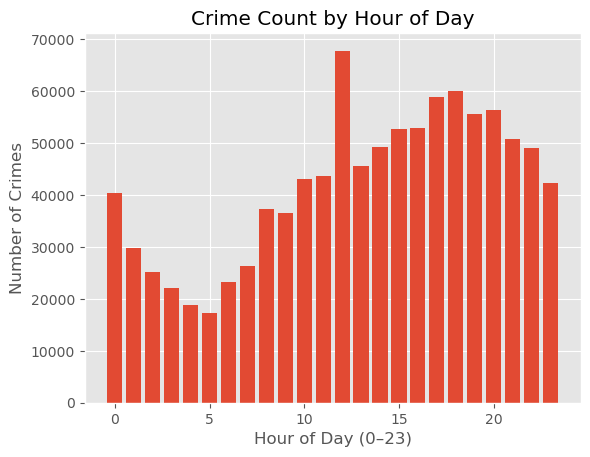

In [103]:
plt.bar(Hourly_crime['HOUR'], Hourly_crime['count'])
plt.title('Crime Count by Hour of Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Crimes') 